In [2]:
# Supressing the warnings first
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [6]:
# Reading the data
df = pd.read_csv(r"C:\Users\Dr D Buragohain\Downloads\telecom_churn_data.csv")

In [11]:
#To get the idea of how the table looks like we can use .head() or .tail() command
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [12]:
# The .shape code gives the no. of rows and columns
df.shape

(99999, 226)

In [13]:
#To get an idea of the numeric values, use .describe()
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [14]:
# The .info() code gives almost the entire information that needs to be inspected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [15]:
# Creating column name list by types of columns
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

In [16]:
# The number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8


In [18]:
# checking to see if any columnns are missed
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == df.shape[1])

True


In [19]:
# looking for missing values
(df.isnull().sum()*100/df.shape[0]).sort_values(ascending=False)

arpu_3g_6            74.846748
night_pck_user_6     74.846748
total_rech_data_6    74.846748
arpu_2g_6            74.846748
max_rech_data_6      74.846748
                       ...    
max_rech_amt_7        0.000000
max_rech_amt_6        0.000000
total_rech_amt_9      0.000000
total_rech_amt_8      0.000000
sep_vbc_3g            0.000000
Length: 226, dtype: float64

Since there are approx 74-75% null values for average recharge amount, max recharge data and total recharge date and date of data recharge for mobile internet data is missing.

In [20]:
# 1 is the min value for recharge column
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [21]:
# we observe from above that there are 3 set of values for

#total recharge amount,
#maximum recharge amount and
#average recharge amount for data.
#total recharge for data
#maximum recharge for data

In [22]:
# the customer didn't recharge because the recharge date and the recharge value are missing
  
df.loc[df.total_rech_data_7.isnull() & df.date_of_last_rech_data_7.isnull(),\
          ["total_rech_data_7", "date_of_last_rech_data_7"]].head(10)

,total_rech_data_7,date_of_last_rech_data_7
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
10,NaN,NaN
11,NaN,NaN
12,NaN,NaN
13,NaN,NaN


In [23]:
# let's check if there are any values where total_rech_data is NA and value is present for av_rech_amt_data and vice versa
# check how many av_rech_amt_data_6 is NA
is_invalid_data_6 = df['av_rech_amt_data_6'] == np.nan
is_invalid_data_7 = df['av_rech_amt_data_7'] == np.nan
is_invalid_data_8 = df['av_rech_amt_data_7'] == np.nan

# check if any value is present for these rows for total_rech_data
print(df.loc[is_invalid_data_6,'total_rech_data_6'].sum())
print(df.loc[is_invalid_data_7,'total_rech_data_7'].sum())
print(df.loc[is_invalid_data_8,'total_rech_data_8'].sum())

# check how many total_rech_data_6 is NA
is_invalid_data_6 = df['total_rech_data_6'] == np.nan 
is_invalid_data_7 = df['total_rech_data_7'] == np.nan 
is_invalid_data_8 = df['total_rech_data_8'] == np.nan 

# check if any value is present for these rows for av_rech_amt_data_6
print(df.loc[is_invalid_data_6,'av_rech_amt_data_6'].sum())
print(df.loc[is_invalid_data_7,'av_rech_amt_data_7'].sum())
print(df.loc[is_invalid_data_8,'av_rech_amt_data_8'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


In [19]:
#We see from above the values are consistent with each other, also as the minimum value is 1 we can impute the NA values by 0, meaning that there was no recharge done by the customer.

In [24]:
#Let's impute 0 in recharge columns
zero_impute_rch = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [25]:
# Now impute missing values with 0
df[zero_impute_rch] = df[zero_impute_rch].apply(lambda x: x.fillna(0))

In [26]:
print(df[zero_impute_rch].isnull().sum()*100/df.shape[1])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [27]:
#  unique values in each column
df.nunique().sort_values(ascending=False)

mobile_number       99999
arpu_6              85681
arpu_7              85308
arpu_8              83615
arpu_9              79937
                    ...  
std_og_t2c_mou_9        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_9        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_6        1
Length: 226, dtype: int64

In [28]:
# Dropping the columns 
df = df.drop(id_cols + date_cols, axis=1)
df.shape

(99999, 212)

In [29]:
# replace missing values with '-1' in categorical columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [30]:
# Verifying the data
print("Missing value ratio:\n")
print(df[cat_cols].isnull().sum()*100/df.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


In [31]:
#Drop variables with more than a given threshold of missing values

initial_cols = df.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(df.apply(lambda column: True if column.isnull().sum()/df.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':df.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
...,...,...
207,aon,True
208,aug_vbc_3g,True
209,jul_vbc_3g,True
210,jun_vbc_3g,True


In [32]:
# drop columns
df = df.loc[:, include_cols]

dropped_cols = df.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-16 columns dropped.


In [33]:
# imputing the respective null columns as 0. 
df[df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = df[df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [34]:
# Filter high-value customers
# Observing recharge columns
rch_df=df.columns[df.columns.str.contains('rech_amt|rech_data')]
rch_df

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [35]:
# null values in recharge columns
100*df.loc[:,rch_df].isnull().sum()/len(df)

total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

In [36]:
df.loc[:,rch_df].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,0.619726,0.681837,0.698517,0.632806,31.792048,32.406314,33.113011,32.387644,48.445409,51.393440,52.027022,49.961089
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,1.760541,1.924382,1.963417,1.669040,77.248778,78.342435,78.872739,78.818696,127.743863,132.629365,131.182609,127.804280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,1.000000,1.000000,1.000000,1.000000,8.000000,14.000000,17.000000,17.000000,8.250000,17.000000,23.000000,17.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [37]:
df.loc[:,rch_df].head(10)

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0
1,74.0,384.0,283.0,121.0,44.0,154.0,65.0,50.0,0.0,1.0,2.0,0.0,0.0,154.0,25.0,0.0,0.0,154.0,50.0,0.0
2,168.0,315.0,116.0,358.0,86.0,200.0,86.0,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,46.0
3,230.0,310.0,601.0,410.0,60.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,196.0,350.0,287.0,200.0,56.0,110.0,110.0,50.0,1.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0
5,120.0,0.0,130.0,130.0,120.0,0.0,130.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,499.0,222.0,294.0,141.0,90.0,37.0,50.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,437.0,601.0,120.0,186.0,90.0,154.0,30.0,36.0,0.0,2.0,3.0,0.0,0.0,154.0,23.0,0.0,0.0,177.0,69.0,0.0
9,220.0,195.0,210.0,180.0,110.0,154.0,50.0,130.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,154.0,0.0,0.0


In [38]:
# Investigation of values for june month only
rch_df_6=df.columns[df.columns.str.contains('rech_amt_6|rech_data_6|rech_amt_data_6')]
df.loc[:,rch_df_6].head(10)

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
0,362.0,252.0,1.0,252.0,252.0
1,74.0,44.0,0.0,0.0,0.0
2,168.0,86.0,0.0,0.0,0.0
3,230.0,60.0,0.0,0.0,0.0
4,196.0,56.0,1.0,56.0,56.0
5,120.0,120.0,0.0,0.0,0.0
6,499.0,90.0,0.0,0.0,0.0
7,1580.0,1580.0,0.0,0.0,0.0
8,437.0,90.0,0.0,0.0,0.0
9,220.0,110.0,0.0,0.0,0.0


In [39]:
df.loc[:,rch_df_6].describe()

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,327.514615,104.637486,0.619726,31.792048,48.445409
std,398.019701,120.614894,1.760541,77.248778,127.743863
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109.000000,30.000000,0.000000,0.000000,0.000000
50%,230.000000,110.000000,0.000000,0.000000,0.000000
75%,437.500000,120.000000,1.000000,8.000000,8.250000
max,35190.000000,4010.000000,61.000000,1555.000000,7546.000000


In [40]:
# Verifying percentage of null values in recharge based columns
100*df.loc[:,rch_df].isnull().sum()/len(df)

total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

In [41]:
# Get the index of null vals for both columns and verify if both matches 
# if the result is false it means all rows of total_rech_data and av_rech_amt_data has null at same rows.
res = df.total_rech_data_6[df.total_rech_data_6.isna()].index != df.av_rech_amt_data_6[df.av_rech_amt_data_6.isna()].index
print('June :', res.any())
res = df.total_rech_data_7[df.total_rech_data_7.isna()].index != df.av_rech_amt_data_7[df.av_rech_amt_data_7.isna()].index
print('July :', res.any())
res =df.total_rech_data_8[df.total_rech_data_8.isna()].index != df.av_rech_amt_data_8[df.av_rech_amt_data_8.isna()].index
print('Aug :', res.any())

June : False
July : False
Aug : False


In [42]:
#With the above test now we know that if total_rech_data is null then av_rech_amt_data is also null

In [43]:
# let's add a new derived variable total recharge amount for data: total_rech_amt_data
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [44]:
any(df.total_rech_amt_6.isna())

False

In [45]:
any(df.total_rech_amt_7.isna())

False

In [46]:
# Total recharge amount for June and July 
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7

In [47]:
# average recharge done by customer in June and July
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [48]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,...,968.0,30.4,0.0,101.20,3.58,252.0,252.0,614.0,504.0,559.0
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,...,1006.0,0.0,0.0,0.00,0.00,0.0,154.0,74.0,538.0,306.0
2,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,37.26,...,1103.0,0.0,0.0,4.17,0.00,0.0,0.0,168.0,315.0,241.5
3,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,310.98,...,2491.0,0.0,0.0,0.00,0.00,0.0,0.0,230.0,310.0,270.0
4,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,83.89,...,1526.0,0.0,0.0,0.00,0.00,56.0,0.0,252.0,350.0,301.0


In [49]:
df[['av_amt_data_6_7', 'total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7']].head()

,av_amt_data_6_7,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7
0,559.0,252.0,252.0,614.0,504.0
1,306.0,0.0,154.0,74.0,538.0
2,241.5,0.0,0.0,168.0,315.0
3,270.0,0.0,0.0,230.0,310.0
4,301.0,56.0,0.0,252.0,350.0


In [50]:
#Filter high-value customers
#Define high-value customers as follows:

#Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [51]:
# 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [52]:
# Extracting High value customers where total average recharge amount for good phase > 70th percentile
high_val_cust = df.loc[df.av_amt_data_6_7 > df.av_amt_data_6_7.quantile(0.7), :]
high_val_cust = high_val_cust.reset_index(drop=True)
high_val_cust.shape

(29953, 201)

In [53]:
print("Number of rows before filtering the high value customers =", len(df))

Number of rows before filtering the high value customers = 99999


In [54]:
print("Number of rows after filtering the high value customers =", len(high_val_cust))

Number of rows after filtering the high value customers = 29953


In [55]:
# delete variables created to filter high-value customers
high_val_cust = high_val_cust.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
high_val_cust.shape

(29953, 196)

In [56]:
high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Columns: 196 entries, loc_og_t2o_mou to sep_vbc_3g
dtypes: float64(196)
memory usage: 44.8 MB


In [57]:
# Churn Derivation

In [58]:
#  total incoming and outgoing minutes of usage
high_val_cust['total_calls_mou_9'] = high_val_cust.total_ic_mou_9 + high_val_cust.total_og_mou_9

In [59]:
#     2g and 3g data consumption
high_val_cust['total_internet_mb_9'] =  high_val_cust.vol_2g_mb_9 + high_val_cust.vol_3g_mb_9

In [60]:
#Tag churners and remove attributes of the churn phase
#Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

#The attributes you need to use to tag churners are:

#total_ic_mou_9
#total_og_mou_9
#vol_2g_mb_9
#vol_3g_mb_9

In [61]:
# Those who have not used either calls or internet in  September are churned customers

# Let's denote 0 as not churn and  1 as churn
high_val_cust['churn'] = high_val_cust.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [62]:
# verify that the churn is tagged correctly

In [63]:
high_val_cust[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

,churn,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,1,0.00,0.00,0.00,0.00
1,1,0.00,0.00,0.00,0.00
2,0,34.91,142.18,0.00,0.00
3,0,252.61,1031.53,0.00,0.00
4,0,127.48,127.63,13.93,314.74
...,...,...,...,...,...
29948,0,391.63,64.21,0.00,0.00
29949,0,149.26,14.44,723.41,232.56
29950,0,547.11,1095.24,9.14,941.48
29951,0,265.84,182.16,0.05,393.34


In [64]:
#After defining the y variable by tagging churners delete the columns having _9 attribute in their name
#After tagging churners, remove all the attributes corresponding to the churn phase
#(all attributes having ‘ _9’, etc. in their names).
#Get the list of columns which has name ends with _9 attribute

In [65]:
# find the columns which has name ends with _9 attribute
month_9_cols = high_val_cust.columns[high_val_cust.columns.str.endswith(pat = '_9')]
print("The columns names ends with _9 are given below...")
month_9_cols

The columns names ends with _9 are given below...


Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9', 'total_calls_mou_9', 'total_internet_mb_9'],
      dtype='object')

In [66]:
# so, deleting derived variables
high_val_cust = high_val_cust.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [67]:
# change data type to category
high_val_cust.churn = high_val_cust.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(high_val_cust.churn.value_counts()*100/high_val_cust.shape[0])

Churn Ratio:
0    91.877274
1     8.122726
Name: churn, dtype: float64


In [68]:
# We see that approx. 8.1% of high value customers have churned

In [69]:
#calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [70]:
high_val_cust['arpu_diff'] = high_val_cust.arpu_8 - ((high_val_cust.arpu_6 + high_val_cust.arpu_7)/2)

high_val_cust['onnet_mou_diff'] = high_val_cust.onnet_mou_8 - ((high_val_cust.onnet_mou_6 + high_val_cust.onnet_mou_7)/2)

high_val_cust['offnet_mou_diff'] = high_val_cust.offnet_mou_8 - ((high_val_cust.offnet_mou_6 + high_val_cust.offnet_mou_7)/2)

high_val_cust['roam_ic_mou_diff'] = high_val_cust.roam_ic_mou_8 - ((high_val_cust.roam_ic_mou_6 + high_val_cust.roam_ic_mou_7)/2)

high_val_cust['roam_og_mou_diff'] = high_val_cust.roam_og_mou_8 - ((high_val_cust.roam_og_mou_6 + high_val_cust.roam_og_mou_7)/2)

high_val_cust['loc_og_mou_diff'] = high_val_cust.loc_og_mou_8 - ((high_val_cust.loc_og_mou_6 + high_val_cust.loc_og_mou_7)/2)

high_val_cust['std_og_mou_diff'] = high_val_cust.std_og_mou_8 - ((high_val_cust.std_og_mou_6 + high_val_cust.std_og_mou_7)/2)

high_val_cust['isd_og_mou_diff'] = high_val_cust.isd_og_mou_8 - ((high_val_cust.isd_og_mou_6 + high_val_cust.isd_og_mou_7)/2)

high_val_cust['spl_og_mou_diff'] = high_val_cust.spl_og_mou_8 - ((high_val_cust.spl_og_mou_6 + high_val_cust.spl_og_mou_7)/2)

high_val_cust['total_og_mou_diff'] = high_val_cust.total_og_mou_8 - ((high_val_cust.total_og_mou_6 + high_val_cust.total_og_mou_7)/2)

high_val_cust['loc_ic_mou_diff'] = high_val_cust.loc_ic_mou_8 - ((high_val_cust.loc_ic_mou_6 + high_val_cust.loc_ic_mou_7)/2)

high_val_cust['std_ic_mou_diff'] = high_val_cust.std_ic_mou_8 - ((high_val_cust.std_ic_mou_6 + high_val_cust.std_ic_mou_7)/2)

high_val_cust['isd_ic_mou_diff'] = high_val_cust.isd_ic_mou_8 - ((high_val_cust.isd_ic_mou_6 + high_val_cust.isd_ic_mou_7)/2)

high_val_cust['spl_ic_mou_diff'] = high_val_cust.spl_ic_mou_8 - ((high_val_cust.spl_ic_mou_6 + high_val_cust.spl_ic_mou_7)/2)

high_val_cust['total_ic_mou_diff'] = high_val_cust.total_ic_mou_8 - ((high_val_cust.total_ic_mou_6 + high_val_cust.total_ic_mou_7)/2)

high_val_cust['total_rech_num_diff'] = high_val_cust.total_rech_num_8 - ((high_val_cust.total_rech_num_6 + high_val_cust.total_rech_num_7)/2)

high_val_cust['total_rech_amt_diff'] = high_val_cust.total_rech_amt_8 - ((high_val_cust.total_rech_amt_6 + high_val_cust.total_rech_amt_7)/2)

high_val_cust['max_rech_amt_diff'] = high_val_cust.max_rech_amt_8 - ((high_val_cust.max_rech_amt_6 + high_val_cust.max_rech_amt_7)/2)

high_val_cust['total_rech_data_diff'] = high_val_cust.total_rech_data_8 - ((high_val_cust.total_rech_data_6 + high_val_cust.total_rech_data_7)/2)

high_val_cust['max_rech_data_diff'] = high_val_cust.max_rech_data_8 - ((high_val_cust.max_rech_data_6 + high_val_cust.max_rech_data_7)/2)

high_val_cust['av_rech_amt_data_diff'] = high_val_cust.av_rech_amt_data_8 - ((high_val_cust.av_rech_amt_data_6 + high_val_cust.av_rech_amt_data_7)/2)

high_val_cust['vol_2g_mb_diff'] = high_val_cust.vol_2g_mb_8 - ((high_val_cust.vol_2g_mb_6 + high_val_cust.vol_2g_mb_7)/2)

high_val_cust['vol_3g_mb_diff'] = high_val_cust.vol_3g_mb_8 - ((high_val_cust.vol_3g_mb_6 + high_val_cust.vol_3g_mb_7)/2)

In [71]:
high_val_cust['total_og_mou_diff'].describe()

count    29953.000000
mean       -67.461292
std        502.520398
min      -7213.410000
25%       -167.865000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

In [72]:
#  9th Month (churned month) Columns
col_9 =  high_val_cust.columns[high_val_cust.columns.str.contains('_9')]

In [73]:
#  all names ending with 9
col_9 = high_val_cust.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9]
cat_cols.append('churn')
num_cols = [col for col in high_val_cust.columns if col not in cat_cols]

In [74]:
# change column types
high_val_cust[num_cols] = high_val_cust[num_cols].apply(pd.to_numeric)
high_val_cust[cat_cols] = high_val_cust[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [75]:
#eda

In [76]:
#  plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


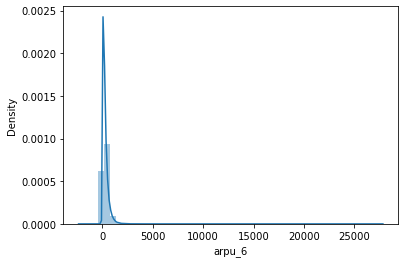

In [77]:
univariate(df.arpu_6)

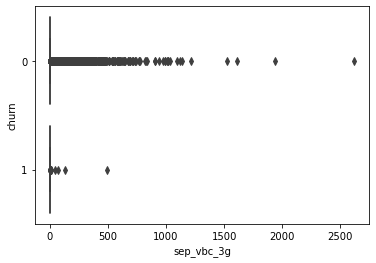

In [78]:
bivariate(high_val_cust.sep_vbc_3g, high_val_cust.churn)

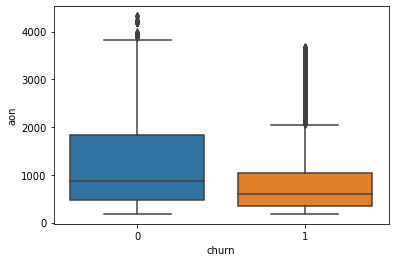

In [79]:
bivariate(high_val_cust.churn, high_val_cust.aon)

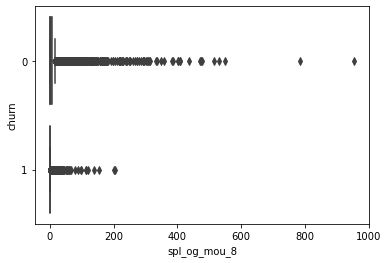

In [80]:
bivariate(high_val_cust.spl_og_mou_8, high_val_cust.churn)

count    99999.000000
mean       175.595457
std        310.968398
min          0.000000
25%         16.030000
50%         74.680000
75%        202.830000
max      10310.760000
Name: offnet_mou_9, dtype: float64


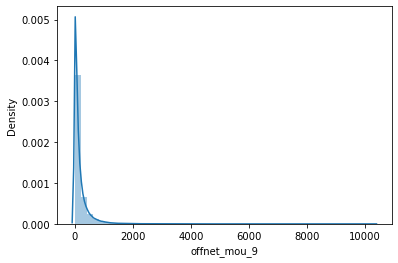

In [81]:
univariate(df.offnet_mou_9)

count    99999.000000
mean       125.864313
std        302.023240
min          0.000000
25%          4.090000
50%         28.040000
75%        106.740000
max      10752.560000
Name: onnet_mou_8, dtype: float64


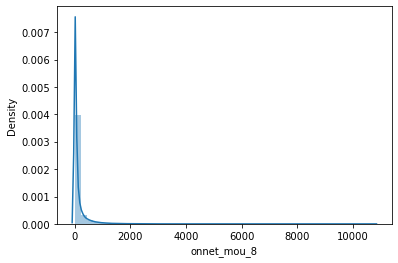

In [82]:
univariate(df.onnet_mou_8)

In [83]:
high_val_cust.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'spl_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff',
       'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=220)

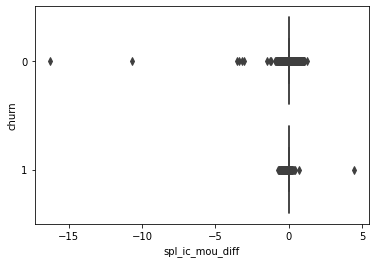

In [84]:
bivariate(high_val_cust.spl_ic_mou_diff, high_val_cust.churn)

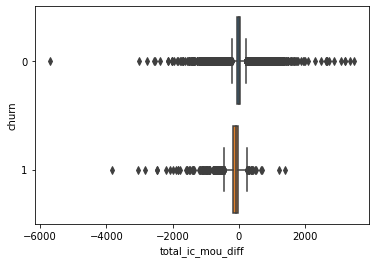

In [85]:
bivariate(high_val_cust.total_ic_mou_diff, high_val_cust.churn)

In [86]:
print('Summary metrics - Numeric Variables')

numeric_df = (high_val_cust.iloc[:,0:20])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,20:40])._get_numeric_data()
print(numeric_df.describe())
  
numeric_df = (high_val_cust.iloc[:,40:60])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,60:80])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,80:100])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,100:120])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,120:140])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,140:160])._get_numeric_data()
print(numeric_df.describe())

Summary metrics - Numeric Variables
       loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         29953.0         29953.0         29953.0  29953.000000   
mean              0.0             0.0             0.0    558.820058   
std               0.0             0.0             0.0    460.868223   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0    310.142000   
50%               0.0             0.0             0.0    482.354000   
75%               0.0             0.0             0.0    700.240000   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean     561.160547    508.890301    467.446183    260.900880    268.051744   
std      480.028497    502.136278    501.837624    459.853278    480.303238   
min    -

In [87]:
#EDA - Summary
# Calls Revenue(3 columns):
#Invalid Values : Having minimum values as negatives, indicating some customers are making loss to the company. These columns are either invalid or not adding value to our prediction, can be dropped from the dataset.

#Standardise: Revenue columns can be rounded to 2 decimal places.

#Minutes of usage(60+ columns):
#Usage minutes is generally 0 except for few outliers, for below variables:
#Roaming Incoming ISD Incoming Special Incoming Others STD incoming T2F STD outgoing T2F Outgoing Others ISD Outgoing Local Outgoing T2C (Customer care calls)

#Most of the columns have outliers.

# Aggregating Columns based on Incoming and Outgoing, or Aggregating based on Each Type of Incoming Calls and Outgoing Calls and looking at the metrics will give a better understanding of the data.

#Recharge (12 Numeric + 3 Date columns)
#Data Type Conversion:

#Data in numeric columns are integers, so can be converted to int type.
#Date columns need to be converted to date type
#Data 2G And 3G(22 Columns)
#Most of the columns have median as O and have outliers

#vbc_3g columns need column renaming as it needs month to be encoded to its number.

#Standardise: Columns can be rounded off to 2 decimal places.

#Age on Network (1 Column)
#Feature can be derived from AON column.

#Churn (Dependent Variable)
#There exists a Class Imbalance in the dataset, where actual churn customers are only 6% of the dataset.

#Reviewing the Dropped Columns:
#More columns will be lost because of dropping missing value columns, while it can be handled to be imputed by considered 0 as missing values follow a pattern where Calls only users have blanks for Data related columns and the vice versa.

#Feature Engineering - Thoughts
#Derive no. of years the customer is using network from AON
#Derive fields to indicate the type of user the customer is: Uses Both Calls and Data, Only Calls, Only Data, Only Incoming calls, Only Outgoing calls, etc.
#Bin the customers into different segments based on Service usage, Recharge amount, Usage/Recharge pattern.
#Calls to Customer Care is a Key indicator that customer is not happy with the services, derive columns like time over call

In [88]:
# create function to anlyze the features across 6th, 7th and 8th month
def analyze_feature(feature_start):
    plt.rcParams["figure.figsize"] = [17, 7]
    fig = plt.figure()
    print("Churn Stats (mean and standard deviation):")
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    print(cols)
    frame_data = []
    [frame_data.append({
        "mean_6": high_val_cust[high_val_cust["churn"] == churn][cols[6]].mean(),
        "mean_7": high_val_cust[high_val_cust["churn"] == churn][cols[7]].mean(),
        "mean_8": high_val_cust[high_val_cust["churn"] == churn][cols[8]].mean(),
        "std_6": high_val_cust[high_val_cust["churn"] == churn][cols[6]].std(),
        "std_7": high_val_cust[high_val_cust["churn"] == churn][cols[7]].std(),
        "std_8": high_val_cust[high_val_cust["churn"] == churn][cols[8]].std()
    }) for churn in [0,1]]
    
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=high_val_cust, y=feature_start + "_6", x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[0])
    sns.boxplot(data=high_val_cust, y=feature_start + "_7",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=high_val_cust, y=feature_start + "_8",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[2])
    return pd.DataFrame(frame_data,index={"Non Churned","Churned"}).round(2)

Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,649.97,663.89,613.98,547.95,574.45,615.04
Churned,787.33,627.46,253.69,682.48,668.66,452.97


<Figure size 1224x504 with 0 Axes>

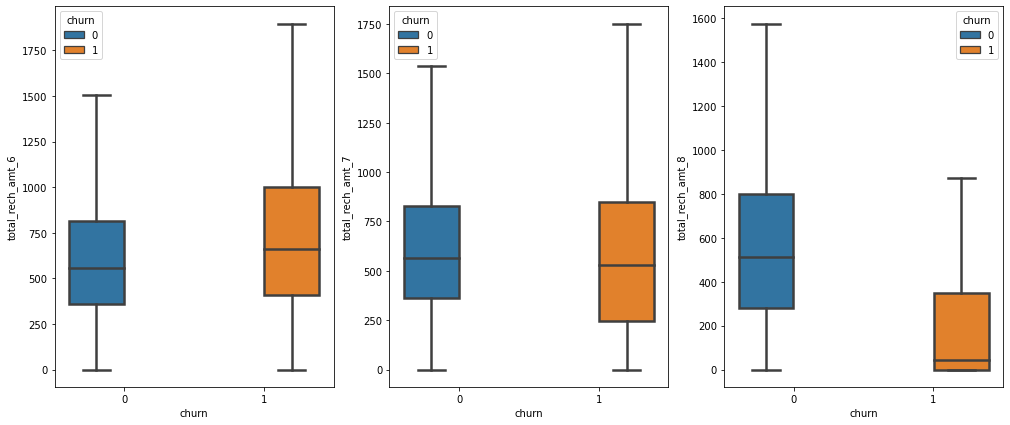

In [89]:
analyze_feature('total_rech_amt')

In [90]:
recharge_amnt_columns =  high_val_cust.columns[high_val_cust.columns.str.contains('rech_amt')]

recharge_amnt_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'av_rech_amt_data_diff'],
      dtype='object')

Churn Stats (mean and standard deviation):
{6: 'max_rech_amt_6', 7: 'max_rech_amt_7', 8: 'max_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,169.10,173.40,166.83,172.1,176.85,171.42
Churned,172.18,159.66,85.54,209.4,227.28,176.90


<Figure size 1224x504 with 0 Axes>

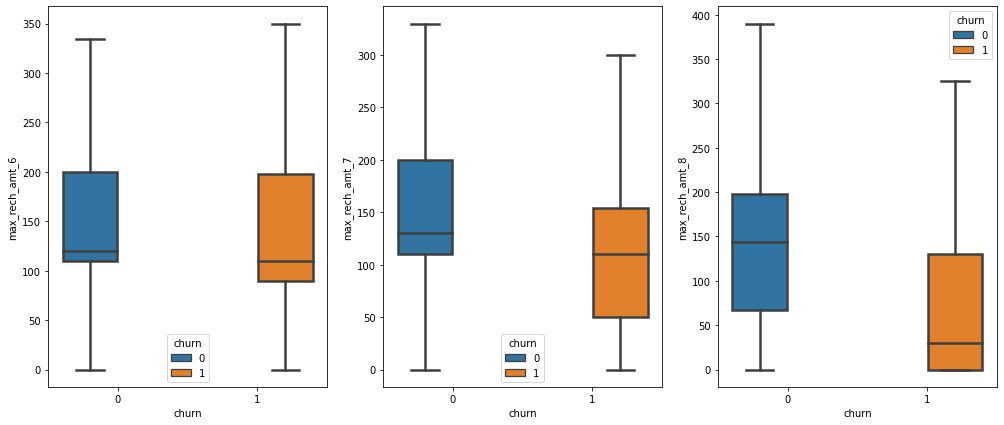

In [91]:
# let's analyze total recharge amount for data:
analyze_feature('max_rech_amt')

In [92]:
pd.crosstab(high_val_cust.churn, high_val_cust.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.918105,97.114275,97.360704
1,14.081895,2.885725,2.639296


In [93]:
pd.crosstab(high_val_cust.churn, high_val_cust.sachet_3g_8)

sachet_3g_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,19.0,20.0,21.0,23.0,25.0,27.0,29.0,30.0,38.0,41.0
churn,,,,,,,,,,,,,,,,,,,,,
0,24936,1608,397,183,106,86,43,35,28,19,...,1,3,3,2,1,1,1,2,1,1
1,2361,48,5,8,4,2,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [95]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [96]:
# cap outliers in the numeric columns
high_val_cust[num_cols] = high_val_cust[num_cols].apply(cap_outliers, axis=0)

In [97]:
high_val_cust.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,...,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,0.0,0.0,0.0,548.514161,551.188115,498.725003,457.829622,244.617463,251.474623,216.847412,...,-0.013711,-12.939341,-1.775336,-77.417346,-9.024191,-0.151190,-6.310569,-13.370373,-20.378957,-9.405241
std,0.0,0.0,0.0,356.773582,361.289210,384.542031,381.720503,371.778970,387.930190,354.977569,...,0.117215,172.824139,5.868286,361.358189,101.273135,1.819270,68.289357,126.503797,187.616192,454.108531
min,0.0,0.0,0.0,-823.784610,-878.924945,-945.808000,-1038.066688,0.000000,0.000000,0.000000,...,-0.537432,-679.434403,-22.081196,-1331.865709,-421.513514,-6.785967,-241.610728,-457.948931,-788.613826,-1881.452483
1%,0.0,0.0,0.0,1.272400,0.726000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.380000,-679.434403,-22.081196,-1207.920000,-421.513514,-6.785967,-241.610728,-449.000000,-788.613826,-1727.872000
10%,0.0,0.0,0.0,171.795000,177.973000,84.302800,23.000000,0.710000,0.580000,0.000000,...,-0.130000,-174.505000,-8.000000,-506.000000,-109.500000,-2.000000,-88.500000,-152.000000,-168.475000,-384.172000
25%,0.0,0.0,0.0,310.142000,310.071000,231.615000,189.750000,17.090000,16.040000,10.440000,...,0.000000,-67.220000,-4.000000,-245.000000,-33.000000,-0.500000,-7.000000,-60.000000,-21.155000,-2.395000
50%,0.0,0.0,0.0,482.354000,481.496000,427.604000,388.093000,84.640000,82.830000,65.660000,...,0.000000,-5.610000,-1.500000,-57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,700.240000,698.829000,661.753000,626.637000,290.490000,290.540000,240.630000,...,0.000000,44.295000,1.000000,99.500000,25.000000,0.000000,0.000000,9.500000,0.000000,0.000000
90%,0.0,0.0,0.0,994.408600,996.170600,977.546400,935.926600,754.560000,784.828000,666.266000,...,0.000000,141.817000,4.500000,301.000000,71.000000,1.500000,50.000000,116.000000,68.267000,312.172000


In [98]:
#building the model now

# got numeric from
high_val_cust['churn'] = pd.to_numeric(high_val_cust['churn'])

In [99]:
X = high_val_cust.drop("churn", axis = 1)
y = high_val_cust.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [100]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

fb_user_8
-1.0    0.141152
0.0     0.062857
1.0     0.025074
Name: churn, dtype: float64

In [101]:
y_test.shape

(7489,)

In [102]:
 y_train.shape

(22464,)

In [103]:
X_train.shape

(22464, 219)

In [104]:
X_test.shape

(7489, 219)

In [105]:
# replace categories with aggregated values
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [106]:
#datatypes 
X_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22464 entries, 14197 to 17924
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  22464 non-null  category
 1   night_pck_user_7  22464 non-null  category
 2   night_pck_user_8  22464 non-null  category
 3   fb_user_6         22464 non-null  category
 4   fb_user_7         22464 non-null  category
 5   fb_user_8         22464 non-null  category
dtypes: category(6)
memory usage: 307.9 KB


In [107]:
# PCA

In [108]:
(high_val_cust.isnull().sum()*100/high_val_cust.shape[0]).sort_values(ascending=False)

loc_og_t2o_mou      0.0
max_rech_data_6     0.0
max_rech_amt_7      0.0
max_rech_amt_8      0.0
max_rech_amt_9      0.0
                   ... 
total_og_mou_7      0.0
total_og_mou_8      0.0
total_og_mou_9      0.0
loc_ic_t2t_mou_6    0.0
vol_3g_mb_diff      0.0
Length: 220, dtype: float64

In [109]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [110]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [111]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.51
1       21.20
2       27.00
3       31.55
4       35.25
        ...  
214    100.00
215    100.00
216    100.00
217    100.00
218    100.00
Length: 219, dtype: float64


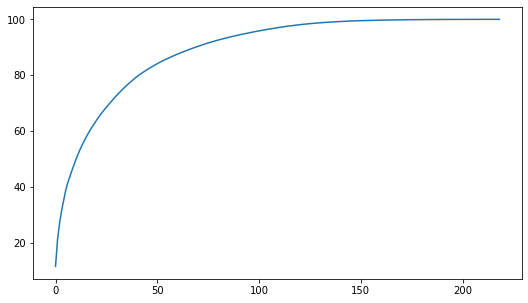

In [122]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [120]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),("pca", PCA(n_components=PCA_VARS)),("logistic", LogisticRegression(class_weight='balanced'))]
pipeline = Pipeline(steps)

NameError: name 'LogisticRegression' is not defined

In [ ]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

In [ ]:
# predicting churn on test data
y_pred = pipeline.predict(X_test)

# creating confusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

In [ ]:
# Hyperparameter tuning

In [ ]:
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

In [ ]:
steps = [("scaler", StandardScaler()),("pca", PCA()),("logistic", logistic)]

In [118]:
# Compiling them
pca_logistic = Pipeline(steps)

NameError: name 'steps' is not defined

In [ ]:
param = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.4, 0.5], 'logistic__penalty': ['l1', 'l2']}

In [ ]:
# 5Folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 20)

In [ ]:
# Model
model = GridSearchCV(estimator = pca_logistic, cv = fold, param_grid = param, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fitting the model
model.fit(X_train, y_train)

In [ ]:
# cross validation
pd.DataFrame(model.cv_results_)

In [ ]:
# best hyperparameters score
model.best_score_

In [ ]:
# best hyperparameters
model.best_params_

In [ ]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),3))

Using random forest

In [ ]:
frt = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

In [ ]:
param = {"criterion": ['gini', 'entropy'], "max_features": [1]}

In [114]:
# creating folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 20)

In [115]:
# Grid search
model = GridSearchCV(estimator=frt, cv=fold, param_grid=param, scoring='roc_auc', n_jobs=-1, verbose=1)

NameError: name 'frt' is not defined

In [116]:
# fitting the model
model.fit(X_train, y_train)

NameError: name 'model' is not defined

In [117]:
# best hyperparameters score
model.best_score_

NameError: name 'model' is not defined

In [130]:
# best hyperparameters
model.best_params_

{'criterion': 'entropy', 'max_features': 1}

In [131]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6859   22]
 [  62  546]]
Sensitivity: 	0.9
Specificity: 	1.0
AUC:    	 1.0


Looks like random forest is overfitting and the sensitivity is very low. So going with logistic and PCA

In [132]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))
rand_frt_model = RandomForestClassifier(n_estimators=100, max_features = max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=20, verbose=1)

In [133]:
# fiting the model
rand_frt_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=None, max_features=15,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=20, verbose=1, warm_start=False)

In [134]:
# checking OOB score
rand_frt_model.oob_score_

0.9996438746438746

In [135]:
# predicting churn on test data
y_pred = rand_frt_model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = rand_frt_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[[6880    1]
 [   0  608]]
Sensitivity: 	1.0
Specificity: 	1.0
ROC:    	 1.0


In [136]:
# predictors
feature = high_val_cust.drop('churn', axis=1).columns

In [137]:
# feature_importance
importance = rand_frt_model.feature_importances_

In [138]:
# creating the dataframe
feature_imp = pd.DataFrame({'variables': feature, 'importance_percentage': importance*100})
feature_imp = feature_imp[['variables', 'importance_percentage']]

In [139]:
# sorting the features
feature_imp = feature_imp.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_imp.importance_percentage.sum())
feature_imp

Sum of importance= 100.0


,variables,importance_percentage
0,loc_ic_t2m_mou_9,10.812733
1,total_ic_mou_9,8.619926
2,loc_ic_mou_9,8.054322
3,loc_og_mou_9,6.561208
4,loc_og_t2t_mou_9,6.318156
5,arpu_9,4.849755
6,loc_ic_t2t_mou_9,4.704393
7,max_rech_amt_9,4.535522
8,total_og_mou_9,4.523905
9,loc_og_t2m_mou_9,4.078045


In [140]:
# extract top 'n' features
top_features = feature_imp.variables[0:50]

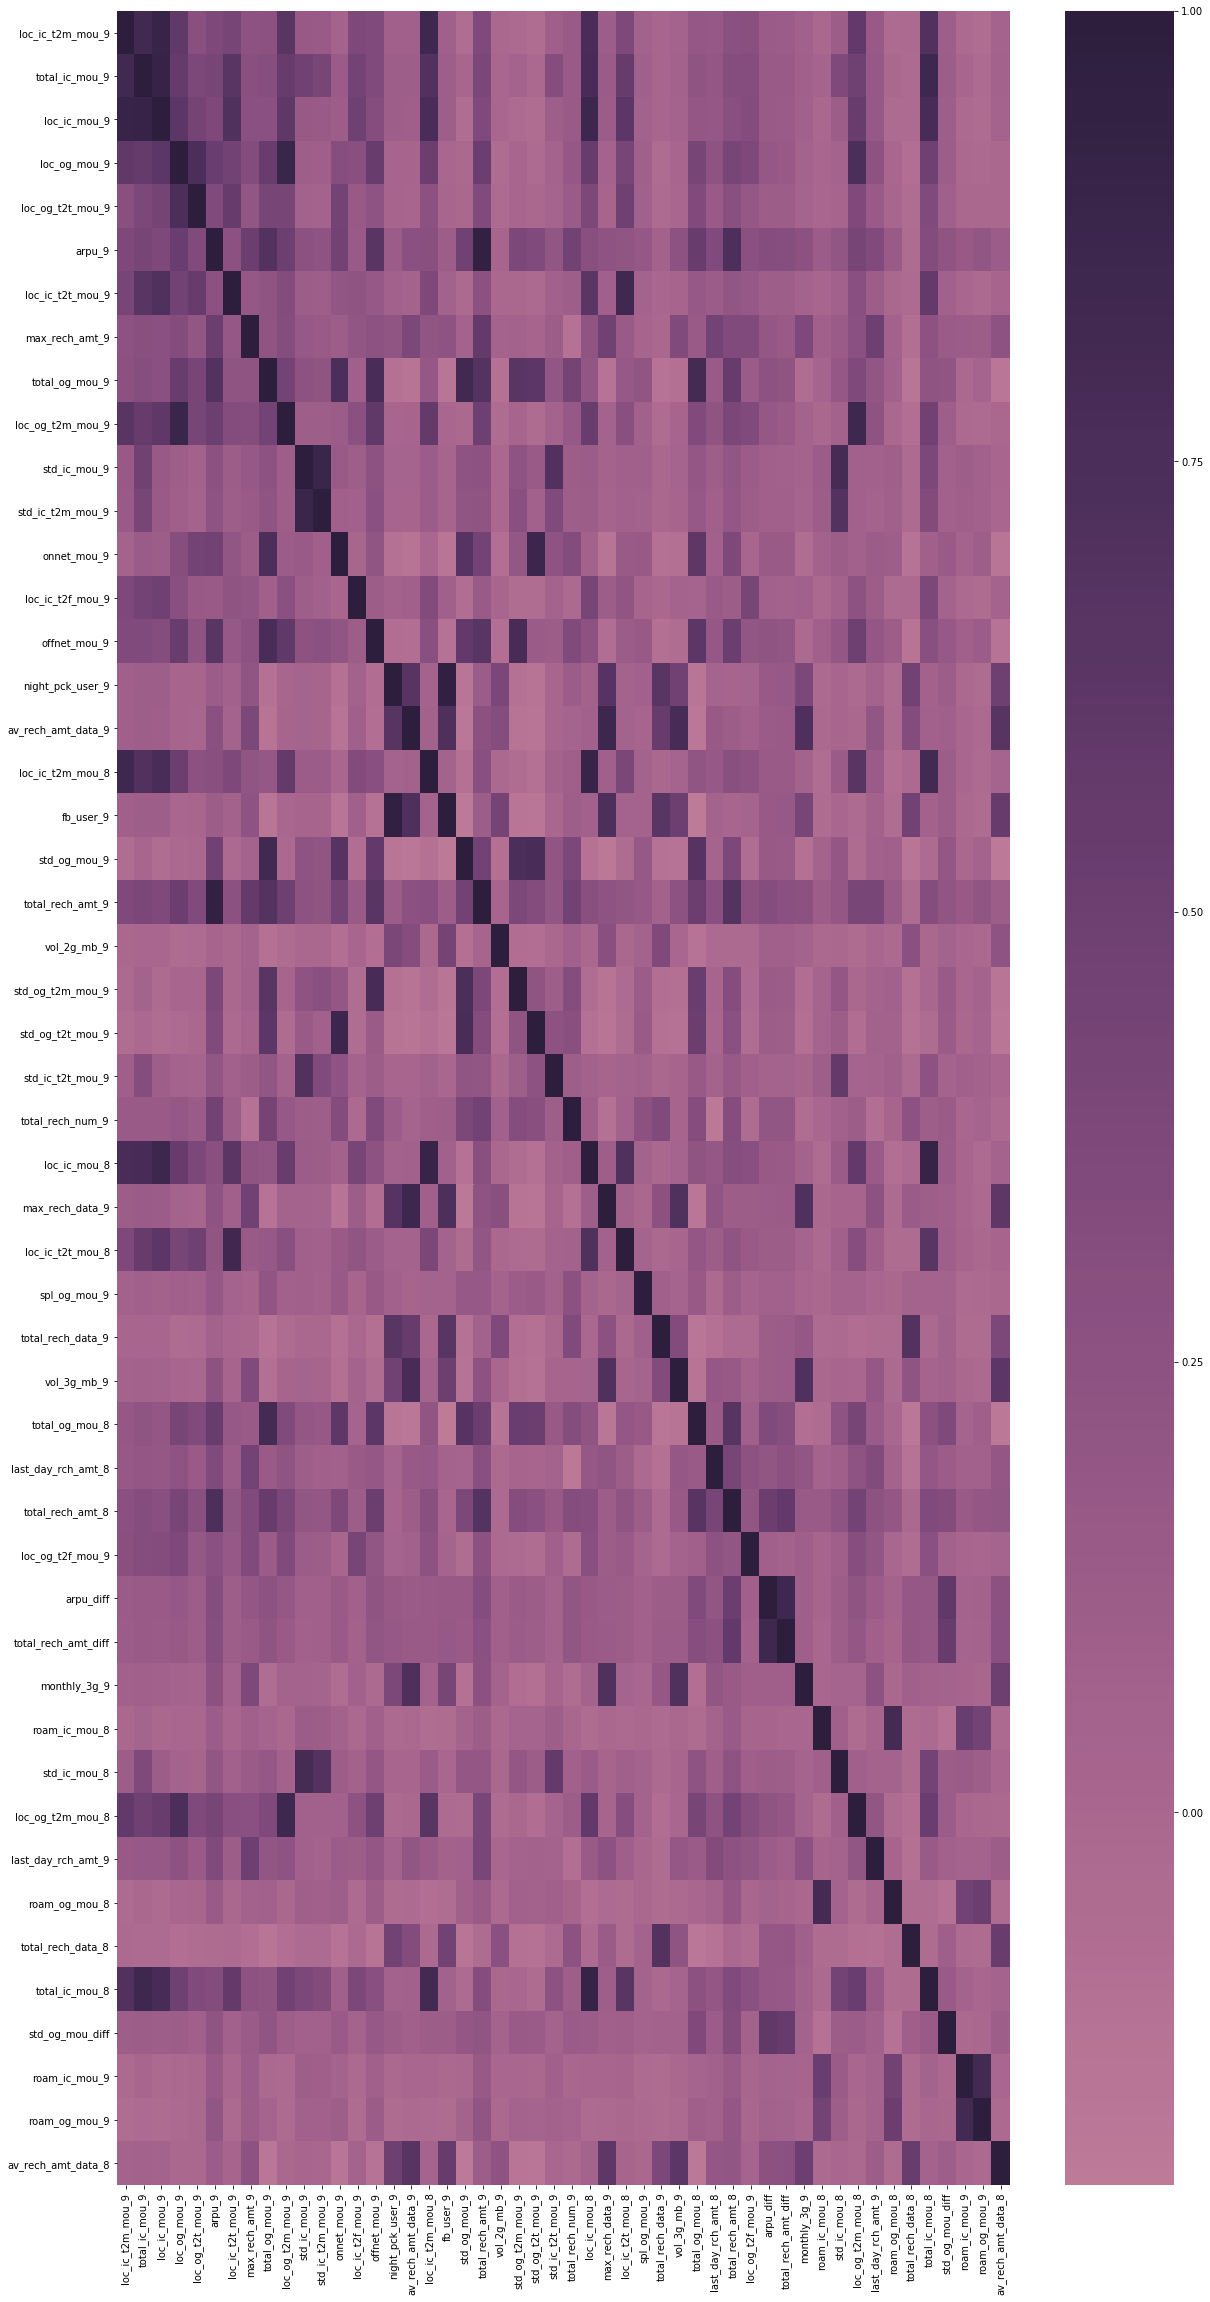

In [141]:
# plot feature correlation
plt.figure(figsize = (20,40))
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0,cmap= sns.cubehelix_palette(200))
plt.show()

In [142]:
# Selecting features that are relevent
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [143]:
# logistic regression
step = [('scaler', StandardScaler()),("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))]

# compiling
logistic = Pipeline(step)

# hyperparameter
param = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# 5 folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# creating gridsearch
model = GridSearchCV(estimator = logistic, cv = fold, param_grid = param, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [144]:
# fitting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    6.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ra

In [145]:
# best hyperparameters score
model.best_score_

0.8736520805539562

In [146]:
# best hyperparameters
model.best_params_

{'logistic__C': 10, 'logistic__penalty': 'l1'}

In [147]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5794 1087]
 [ 120  488]]
Sensitivity: 	0.8
Specificity: 	0.84
ROC:    	 0.88


In [148]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [149]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [150]:
# coefficients
coefficient = logistic_model.coef_.reshape((9, 1)).tolist()
coefficient = [val for sublist in coefficient for val in sublist]
coefficient = [round(coefficient, 3) for coefficient in coefficient]
logistic_feature = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_feature)

In [151]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.518933,-1.148323,-0.70272,-1.528045,0.236129,-0.019553,0.211813,0.0619,-0.790858,0.942591


### Main indicator of churn
It is evident from the information above that the factors affecting churn are as follows:
- <br> total_ic_mou_8 (Total incoming call: Minutes of usage in the action phase)
- <br> total_og_mou_8 (Total outgoing call: Minutes of usage in the action phase)
- <br> total_rech_amt_diff (Total recharge amount difference)
- <br> roam_ic_mou_8 (Roaming incoming call: Minutes of usage in the action phase)
- <br> arpu (Average revenue per user)
- <br> roam_og_mou_8 (Roaming outgoing call: Minutes of usage in the action phase)
- <br> std_og_mou_8 (STD outgoing call: Minutes of usage in the action phase)
- <br> std_ic_mou_8(STD incoming call: Minutes of usage in the action phase)
- <br> av_rech_amt_data_8(average recharge amount in the action phase).

### Measures that can be taken to reduce churn
- Measures to reduce churn
- <BR> Customers should receive special discounts based on their usage.

- <BR> Offer more Internet services when you recharge.

- <BR> Make contact with customers to fulfill their needs.

- <BR> Lower data usage fees and improved 2G coverage in areas without 3G.

- <BR> expansion of the 3G network in areas where it is not yet available.